# Feature Selection: Correlation analysis

## 1.Correlation Cofficient

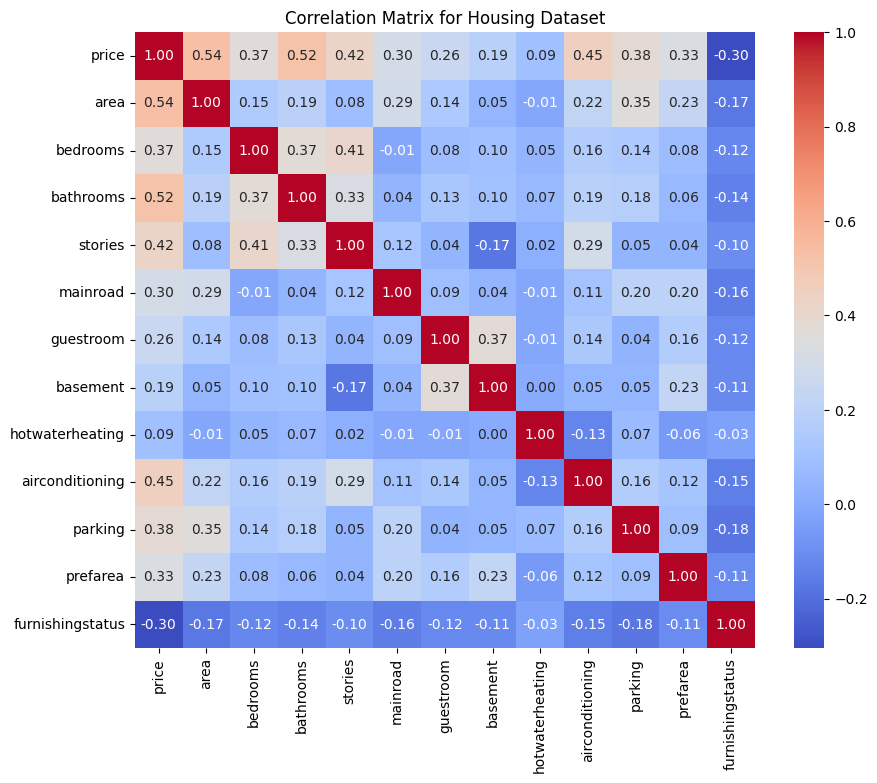

Correlation with target (price increase):
 price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64


In [3]:
import piplite 
await piplite.install('seaborn')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert non-numeric columns to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Correlation matrix
corr_matrix = data.corr()

# Visualize correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Housing Dataset')
plt.show()

# Correlation with the target variable (price increase or not)
correlation_with_target = corr_matrix['price'].sort_values(ascending=False)
print("Correlation with target (price increase):\n", correlation_with_target)

#### Correlation Matrix:

The correlation matrix displays the relationships between different features. Darker colors in the heatmap indicate stronger correlations (either positive or negative), while lighter colors indicate weaker correlations.

#### The values range between 1 and -1:
Values close to 1 indicate a strong positive correlation (as one variable increases, the other also increases).

Values close to -1 indicate a strong negative correlation (as one variable increases, the other decreases).

Values close to 0 indicate no clear correlation between the two variables.

#### Relationship with Price:
area: The correlation with price is 0.54, indicating a moderately strong positive correlation between the size of the house and its price. As the area increases, so does the price.

bathrooms: The correlation with price is 0.52, meaning that the number of bathrooms has a positive impact on price. More bathrooms generally lead to a higher price.

airconditioning: A correlation of 0.45 indicates that having air conditioning has a noticeable positive effect on the price.

stories: A correlation of 0.42 suggests that the number of stories (floors) has a positive impact on the price.

parking: A correlation of 0.38 shows that having parking spaces has a moderate effect on price.

#### Factors with Low or Negative Impact:
furnishingstatus: A correlation of -0.30 suggests that the furnishing status negatively affects the price, meaning fully furnished homes may not always lead to a significantly higher price.

hotwaterheating: With a correlation of 0.09, the presence of a hot water heating system does not significantly affect the price.

#### Categorical Features:
Features like mainroad and prefarea show moderate correlations (around 0.3), meaning that proximity to a main road or being located in a preferred area has some impact on the price, but they are not the most crucial factors.

## 2.Chi sequared

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('Housing.csv')

# Convert categorical columns to numerical
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

# Convert price into binary categories (0: low, 1: high)
price_median = df['price'].median()
df['price_category'] = (df['price'] > price_median).astype(int)

# List of categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Perform Chi-Square test for each categorical feature against the new 'price_category'
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['price_category'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test for {feature}:")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


Chi-Square Test for mainroad:
Chi-Square Statistic: 49.648755717253195
P-value: 1.8388667372733367e-12
Degrees of Freedom: 1
Expected Frequencies:
[[ 38.85321101  38.14678899]
 [236.14678899 231.85321101]]

Chi-Square Test for guestroom:
Chi-Square Statistic: 49.60725904920895
P-value: 1.878174932977533e-12
Degrees of Freedom: 1
Expected Frequencies:
[[226.05504587 221.94495413]
 [ 48.94495413  48.05504587]]

Chi-Square Test for basement:
Chi-Square Statistic: 25.05658644325748
P-value: 5.567226393093908e-07
Degrees of Freedom: 1
Expected Frequencies:
[[178.62385321 175.37614679]
 [ 96.37614679  94.62385321]]

Chi-Square Test for hotwaterheating:
Chi-Square Statistic: 0.20837674825174762
P-value: 0.6480426778063941
Degrees of Freedom: 1
Expected Frequencies:
[[262.3853211 257.6146789]
 [ 12.6146789  12.3853211]]

Chi-Square Test for airconditioning:
Chi-Square Statistic: 82.5573268915961
P-value: 1.0264941970676871e-19
Degrees of Freedom: 1
Expected Frequencies:
[[188.21100917 184.788

### Chi-Square Test Results Analysis

##### Analysis of the mainroad feature:
There is a statistically significant association between the presence of a main road near the house and its price. Homes located near main roads tend to have different prices compared to homes that are not located near such roads.

##### Analysis of the guestroom feature:
The presence of a guestroom in a house significantly impacts its price. Homes with a guestroom typically have different prices compared to homes without one.

##### Analysis of the basement feature:
Having a basement in a house has a noticeable effect on the price. Homes with basements are priced differently compared to homes without basements.

##### Analysis of the hotwaterheating feature:
The presence of hot water heating in a house does not have a significant effect on the price. This means that whether a house has hot water heating or not doesn't clearly impact whether the price is high or low.

##### Analysis of the airconditioning feature:
Air conditioning is strongly associated with the price of a house. Homes with air conditioning are generally priced higher than those without it.

##### Analysis of the prefarea feature:
Homes located in preferred areas tend to be priced higher compared to those in less desirable locations. There is a strong relationship between the house's location and its price.

### Conclusion:
Based on the Chi-Square test results, features such as the presence of a main road, guestroom, basement, air conditioning, and the house’s location significantly impact its price. On the other hand, having hot water heating does not seem to play a major role in determining the price.






